In [1]:
class Student(object):
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def study(self, course_name):
        print('%s正在学习%s.' % (self.name, course_name))

    def watch_movie(self):
        if self.age < 18:
            print('%s只能观看《熊出没》.' % self.name)
        else:
            print('%s正在观看岛国爱情大电影.' % self.name)



In [4]:
def main():
    stu1 = Student('小明', 10)
    stu1.study('Python程序设计')
    stu1.watch_movie()

    stu2 = Student('小红', 20)
    stu2.study('思想品德')
    stu2.watch_movie()

if __name__ == '__main__':
    main()

小明正在学习Python程序设计.
小明只能观看《熊出没》.
小红正在学习思想品德.
小红正在观看岛国爱情大电影.


### 访问可见性问题
对于上面的代码，有C++、Java、C#等编程经验的程序员可能会问，我们给Student对象绑定的name和age属性到底具有怎样的访问权限（也称为可见性）。因为在很多面向对象编程语言中，我们通常会将对象的属性设置为私有的（private）或受保护的（protected），简单的说就是不允许外界访问，而对象的方法通常都是公开的（public），因为公开的方法就是对象能够接受的消息。在Python中，属性和方法的访问权限只有两种，也就是公开的和私有的，如果希望属性是私有的，在给属性命名时可以用两个下划线作为开头，下面的代码可以验证这一点

In [5]:
class Test:

    def __init__(self, foo):
        self.__foo = foo

    def __bar(self):
        print(self.__foo)
        print('__bar')


def main():
    test = Test('hello')
    test._Test__bar()
    print(test._Test__foo)


if __name__ == "__main__":
    main()

hello
__bar
hello


In [6]:
class A:
    def __init__(self):
        self.__v = 0

o = A() # instantiate an object
print(o.__v) # error

AttributeError: 'A' object has no attribute '__v'

In [7]:
class A:
    def __init__(self):
        self.__v = 0 # private variable

    def print_v(self):
        print(self.__v)

o = A() # instantiate an object
o.print_v() # 0

0


In [8]:
class A:
    def __init__(self):
        self.__v = 0 # private variable

    def __print_v(self): # private method
        print(self.__v)

o = A() # instantiate an object
o.__print_v() # 0

AttributeError: 'A' object has no attribute '__print_v'

但是，Python并没有从语法上严格保证私有属性或方法的私密性，它只是给私有的属性和方法换了一个名字来妨碍对它们的访问，事实上如果你知道更换名字的规则仍然可以访问到它们，下面的代码就可以验证这一点。之所以这样设定，可以用这样一句名言加以解释，就是"We are all consenting adults here"。因为绝大多数程序员都认为开放比封闭要好，而且程序员要自己为自己的行为负责。

In [9]:
class A:
    def __init__(self):
        self.__v = 0

o = A() # instantiate an object
print(o._A__v) 

0


### 封装 Encapsulation

面向对象有三大支柱：封装、继承和多态。后面两个概念在下一个章节中进行详细的说明，这里我们先说一下什么是封装。我自己对封装的理解是"隐藏一切可以隐藏的实现细节，只向外界暴露（提供）简单的编程接口"。我们在类中定义的方法其实就是把数据和对数据的操作封装起来了，在我们创建了对象之后，只需要给对象发送一个消息（调用方法）就可以执行方法中的代码，也就是说我们只需要知道方法的名字和传入的参数（方法的外部视图），而不需要知道方法内部的实现细节（方法的内部视图）。

In [13]:
from time import sleep


class Clock(object):
    """数字时钟"""
    
    '''
    description: 
    param {*} self
    param {*} hour
    param {*} minute
    param {*} second
    return {*}
    '''    
    def __init__(self, hour=0, minute=0, second=0):
        
        self._hour = hour
        self._minute = minute
        self._second = second

    def run(self):
        """走字"""
        self._second += 1
        if self._second == 60:
            self._second = 0
            self._minute += 1
            if self._minute == 60:
                self._minute = 0
                self._hour += 1
                if self._hour == 24:
                    self._hour = 0

    def show(self):
        """显示时间"""
        return '%02d:%02d:%02d' % \
               (self._hour, self._minute, self._second)
    

def main():
    clock = Clock(23, 59, 58)
    while True:
        print(clock.show())
        sleep(1)
        clock.run()
    
if __name__ == '__main__':
    main()

23:59:58
23:59:59
00:00:00
00:00:01
00:00:02
00:00:03


KeyboardInterrupt: 

In [16]:
class A:
    valid_kwds = ['a']
    def __init__(self, **kwds):
        for key, val in kwds.items():
            if key in self.valid_kwds:
                print(key, val)


class B(A):
    valid_kwds = ['b']
    def __init__(self, **kwds):
        left_kwargs = {}
        for key, val in kwds.items():
            if key in self.valid_kwds:
                print(key, val)
            else:
                left_kwargs[key] = val
        super().__init__(**left_kwargs)

o = B(a=1, b=2)

b 2


In [17]:
class A:
    __valid_kwds = ['a']
    def __init__(self, **kwds):
        for key, val in kwds.items():
            if key in self.__valid_kwds:
                print(key, val)


class B(A):
    valid_kwds = ['b']
    def __init__(self, **kwds):
        left_kwargs = {}
        for key, val in kwds.items():
            if key in self.valid_kwds:
                print(key, val)
            else:
                left_kwargs[key] = val
        super().__init__(**left_kwargs)

o = B(a=1, b=2)

b 2
a 1


@property装饰器

之前我们讨论过Python中属性和方法访问权限的问题，虽然我们不建议将属性设置为私有的，但是如果直接将属性暴露给外界也是有问题的，比如我们没有办法检查赋给属性的值是否有效。我们之前的建议是将属性命名以单下划线开头，通过这种方式来暗示属性是受保护的，不建议外界直接访问，那么如果想访问属性可以通过属性的getter（访问器）和setter（修改器）方法进行对应的操作。如果要做到这点，就可以考虑使用@property包装器来包装getter和setter方法，使得对属性的访问既安全又方便，代码如下所示。

In [8]:
class Person(object):

    def __init__(self, name, age):
        self.name = name
        self.age = age

    # getter method
    
    def name(self):
        return self.name
    
    
    def age(self):
        return self.age

    # setter method
    
    def age(self, age):
        self.age = age

    def play(self):
        if self.age <= 16:
            print('%s正在玩飞行棋.' % self.name)
        else:
            print('%s正在玩斗地主.' % self.name)

def main():
    person = Person('王大锤', 12)
    person.play()
    person.age = 22
    person.play()


if __name__ == '__main__':
    main()

王大锤正在玩飞行棋.
王大锤正在玩斗地主.


### make it private

In [16]:
class Person(object):

    def __init__(self, name, age):
        self._name = name
        self._age = age

    # getter method
    @property
    def name(self):
        return self._name
    
    @property
    def age(self):
        return self._age

    # setter method
    @age.setter
    def age(self, age):
        self._age = age

    def play(self):
        if self._age <= 16:
            print('%s正在玩飞行棋.' % self.name)
        else:
            print('%s正在玩斗地主.' % self.name)

def main():
    person = Person('王大锤', 12)
    person.play()
    person.age = 22
    person.play()

    


if __name__ == '__main__':
    main()
    

王大锤正在玩飞行棋.
王大锤正在玩斗地主.


Class Without Getters and Setters

Links: https://www.programiz.com/python-programming/property

In [20]:
class Celsius:
    def __init__(self, temperature = 0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32


# Basic method of setting and getting attributes in Python
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32


# Create a new object
human = Celsius()

# Set the temperature
human.temperature = 37

# Get the temperature attribute
print(human.temperature)

# Get the to_fahrenheit method
print(human.to_fahrenheit())

print(human.__dict__)

print(human.__dict__['temperature'])

37
98.60000000000001
{'temperature': 37}
37


Using Getters and Setters


In [23]:
# Making Getters and Setter methods
class Celsius:
    def __init__(self, temperature=0):
        self.set_temperature(temperature)

    def to_fahrenheit(self):
        return (self.get_temperature() * 1.8) + 32

    # getter method
    def get_temperature(self):
        return self._temperature

    # setter method
    def set_temperature(self, value):
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible.")
        self._temperature = value


# Making Getters and Setter methods
class Celsius:
    def __init__(self, temperature=0):
        self.set_temperature(temperature)

    def to_fahrenheit(self):
        return (self.get_temperature() * 1.8) + 32

    # getter method
    def get_temperature(self):
        return self._temperature

    # setter method
    def set_temperature(self, value):
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible.")
        self._temperature = value


# Create a new object, set_temperature() internally called by __init__
human = Celsius(37)

# Get the temperature attribute via a getter
print(human.get_temperature())

# Get the to_fahrenheit method, get_temperature() called by the method itself
print(human.to_fahrenheit())

# new constraint implementation
human.set_temperature(-300)

# Get the to_fahreheit method
print(human.to_fahrenheit())

37
98.60000000000001


ValueError: Temperature below -273.15 is not possible.

However, the bigger problem with the above update is that all the programs that implemented our previous class have to modify their code from obj.temperature to obj.get_temperature() and all expressions like obj.temperature = val to obj.set_temperature(val).

This refactoring can cause problems while dealing with hundreds of thousands of lines of codes.

All in all, our new update was not backwards compatible. This is where @property comes to rescue.

The property Class

A pythonic way to deal with the above problem is to use the property class. Here is how we can update our code:

In [26]:
# using property class
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    # getter
    def get_temperature(self):
        print("Getting value...")
        return self._temperature

    # setter
    def set_temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
        self._temperature = value

    # creating a property object
    temperature = property(get_temperature, set_temperature)


human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

human.temperature = -300



Setting value...
Getting value...
37
Getting value...
98.60000000000001
Setting value...


ValueError: Temperature below -273.15 is not possible

As we can see, any code that retrieves the value of temperature will automatically call get_temperature() instead of a dictionary (__dict__) look-up.

Similarly, any code that assigns a value to temperature will automatically call set_temperature().

We can even see above that set_temperature() was called even when we created an object.

</br>
</br>

Can you guess why?

The reason is that when an object is created, the __init__() method gets called. This method has the line self.temperature = temperature. This expression automatically calls set_temperature().

Similarly, any access like c.temperature automatically calls get_temperature(). This is what property does.

By using property, we can see that no modification is required in the implementation of the value constraint. Thus, our implementation is backward compatible.

</br>

Note: The actual temperature value is stored in the private _temperature variable. The temperature attribute is a property object which provides an interface to this private variable.

The @property Decorator
In Python, property() is a built-in function that creates and returns a property object. The syntax of this function is:

```python
property(fget=None, fset=None, fdel=None, doc=None)
```
Here,

- fget is function to get value of the attribute
- fset is function to set value of the attribute
- fdel is function to delete the attribute
- doc is a string (like a comment)
As seen from the implementation, these function arguments are optional.

A property object has three methods, getter(), setter(), and deleter() to specify fget, fset and fdel at a later point. This means, the line:
```python
temperature = property(get_temperature,set_temperature)
```
can be broken down as:
```python
# make empty property
temperature = property()

# assign fget
temperature = temperature.getter(get_temperature)

# assign fset
temperature = temperature.setter(set_temperature)
```
These two pieces of code are equivalent.

Programmers familiar with Python Decorators can recognize that the above construct can be implemented as decorators.

We can even not define the names get_temperature and set_temperature as they are unnecessary and pollute the class namespace.

For this, we reuse the temperature name while defining our getter and setter functions. Let's look at how to implement this as a decorator:

In [28]:
# Using @property decorator
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    @property
    def temperature(self):
        print("Getting value...")
        return self._temperature

    @temperature.setter
    def temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273 is not possible")
        self._temperature = value


# create an object
human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

coldest_thing = Celsius(-300)

Setting value...
Getting value...
37
Getting value...
98.60000000000001
Setting value...


ValueError: Temperature below -273 is not possible

### 静态方法和类方法
之前，我们在类中定义的方法都是对象方法，也就是说这些方法都是发送给对象的消息。实际上，我们写在类中的方法并不需要都是对象方法，例如我们定义一个“三角形”类，通过传入三条边长来构造三角形，并提供计算周长和面积的方法，但是传入的三条边长未必能构造出三角形对象，因此我们可以先写一个方法来验证三条边长是否可以构成三角形，这个方法很显然就不是对象方法，因为在调用这个方法时三角形对象尚未创建出来（因为都不知道三条边能不能构成三角形），所以这个方法是属于三角形类而并不属于三角形对象的。我们可以使用静态方法来解决这类问题，代码如下所示。

In [31]:
from math import sqrt


class Triangle(object):

    def __init__(self, a, b, c):
        self._a = a
        self._b = b
        self._c = c

    @staticmethod
    def is_valid(a, b, c):
        return a + b > c and b + c > a and a + c > b

    def perimeter(self):
        return self._a + self._b + self._c

    def area(self):
        half = self.perimeter() / 2
        return sqrt(half * (half - self._a) *
                    (half - self._b) * (half - self._c))


def main():
    a, b, c = 3, 4, 5
    # 静态方法和类方法都是通过给类发消息来调用的
    if Triangle.is_valid(a, b, c):
        t = Triangle(a, b, c)
        print(t.perimeter())
        # 也可以通过给类发消息来调用对象方法但是要传入接收消息的对象作为参数
        # print(Triangle.perimeter(t))
        print(t.area())
        # print(Triangle.area(t))
    else:
        print('无法构成三角形.')


if __name__ == '__main__':
    main()

12
6.0


和静态方法比较类似，Python还可以在类中定义类方法，类方法的第一个参数约定名为cls，它代表的是当前类相关的信息的对象（类本身也是一个对象，有的地方也称之为类的元数据对象），通过这个参数我们可以获取和类相关的信息并且可以创建出类的对象，代码如下所示

In [ ]:
from time import time, localtime, sleep


class Clock(object):
    """数字时钟"""

    def __init__(self, hour=0, minute=0, second=0):
        self._hour = hour
        self._minute = minute
        self._second = second

    @classmethod
    def now(cls):
        ctime = localtime(time())
        return cls(ctime.tm_hour, ctime.tm_min, ctime.tm_sec)

    def run(self):
        """走字"""
        self._second += 1
        if self._second == 60:
            self._second = 0
            self._minute += 1
            if self._minute == 60:
                self._minute = 0
                self._hour += 1
                if self._hour == 24:
                    self._hour = 0

    def show(self):
        """显示时间"""
        return '%02d:%02d:%02d' % \
               (self._hour, self._minute, self._second)


def main():
    # 通过类方法创建对象并获取系统时间
    clock = Clock.now()
    while True:
        print(clock.show())
        sleep(1)
        clock.run()


if __name__ == '__main__':
    main()

In [46]:
from time import time, localtime


localtime()

time.struct_time(tm_year=2023, tm_mon=8, tm_mday=21, tm_hour=2, tm_min=9, tm_sec=49, tm_wday=0, tm_yday=233, tm_isdst=1)

### 类之间的关系
简单的说，类和类之间的关系有三种：is-a、has-a和use-a关系。

is-a关系也叫继承或泛化，比如学生和人的关系、手机和电子产品的关系都属于继承关系。
has-a关系通常称之为关联，比如部门和员工的关系，汽车和引擎的关系都属于关联关系；关联关系如果是整体和部分的关联，那么我们称之为聚合关系；如果整体进一步负责了部分的生命周期（整体和部分是不可分割的，同时同在也同时消亡），那么这种就是最强的关联关系，我们称之为合成关系。
use-a关系通常称之为依赖，比如司机有一个驾驶的行为（方法），其中（的参数）使用到了汽车，那么司机和汽车的关系就是依赖关系。

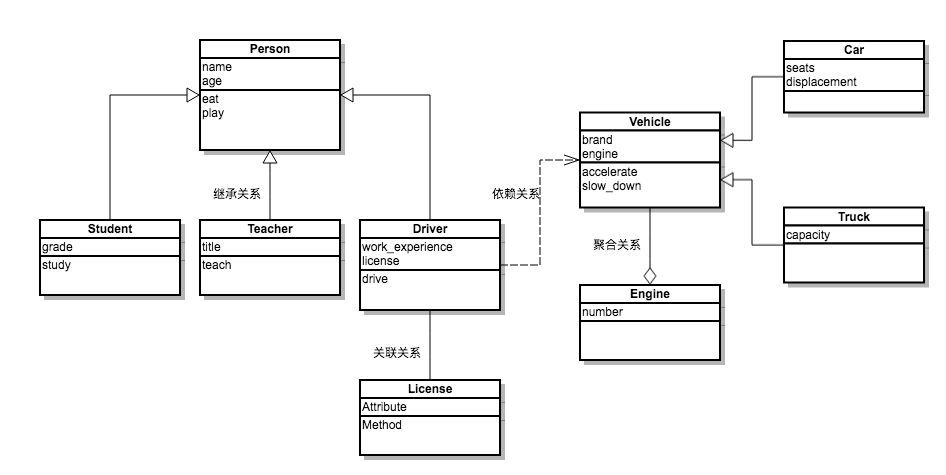



### 继承和多态
刚才我们提到了，可以在已有类的基础上创建新类，这其中的一种做法就是让一个类从另一个类那里将属性和方法直接继承下来，从而减少重复代码的编写。提供继承信息的我们称之为父类，也叫超类或基类；得到继承信息的我们称之为子类，也叫派生类或衍生类。子类除了继承父类提供的属性和方法，还可以定义自己特有的属性和方法，所以子类比父类拥有的更多的能力，在实际开发中，我们经常会用子类对象去替换掉一个父类对象，这是面向对象编程中一个常见的行为，对应的原则称之为里氏替换原则。下面我们先看一个继承的例子。

In [1]:
class Person():
    """人"""

    def __init__(self, name, age):
        self._name = name
        self._age = age

    @property
    def name(self):
        return self._name

    @property
    def age(self):
        return self._age

    @age.setter
    def age(self, age):
        self._age = age

    def play(self):
        print('%s正在愉快的玩耍.' % self._name)

    def watch_av(self):
        if self._age >= 18:
            print('%s正在观看爱情动作片.' % self._name)
        else:
            print('%s只能观看《熊出没》.' % self._name)


class Student(Person):
    """学生"""

    def __init__(self, name, age, grade):
        super().__init__(name, age)
        self._grade = grade

    # getter
    @property
    def grade(self):
        return self._grade
    
    # setter
    @grade.setter
    def grade(self, grade):
        self._grade = grade

    def study(self, course):
        print('%s的%s正在学习%s.' % (self._grade, self._name, course))


class Teacher(Person):
    """老师"""

    def __init__(self, name, age, title):
        super().__init__(name, age)
        self._title = title

    # getter
    @property
    def title(self):
        return self._title
    
    # setter
    @title.setter
    def title(self, title):
        self._title = title

    def teach(self, course):
        print('%s%s正在讲%s.' % (self._name, self._title, course))


def main():
    stu = Student('王大锤', 15, '初三')
    stu.study('数学')
    stu.watch_av()
    t = Teacher('骆昊', 38, '砖家')
    t.teach('Python程序设计')
    t.watch_av()


if __name__ == '__main__':
    main()

初三的王大锤正在学习数学.
王大锤只能观看《熊出没》.
骆昊砖家正在讲Python程序设计.
骆昊正在观看爱情动作片.


子类在继承了父类的方法后，可以对父类已有的方法给出新的实现版本，这个动作称之为方法重写（override）。通过方法重写我们可以让父类的同一个行为在子类中拥有不同的实现版本，当我们调用这个经过子类重写的方法时，不同的子类对象会表现出不同的行为，这个就是多态（poly-morphism）。

In [2]:
from abc import ABCMeta, abstractmethod

class Pet(metaclass=ABCMeta):
    """宠物"""

    def __init__(self, nickname):
        self._nickname = nickname

    @abstractmethod
    def make_voice(self):
        pass


class Dog(Pet):
    """狗"""

    def make_voice(self):
        print('%s: 汪汪汪...' % self._nickname)

class Cat(Pet):
    """猫"""

    def make_voice(self):
        print('%s: 喵...喵...' % self._nickname)

def main():
    pets = [Dog('旺财'), Cat('凯蒂'), Dog('大黄')]
    for pet in pets:
        pet.make_voice()


if __name__ == '__main__':
    main()
    



旺财: 汪汪汪...
凯蒂: 喵...喵...
大黄: 汪汪汪...


在上面的代码中，我们将Pet类处理成了一个抽象类，所谓抽象类就是不能够创建对象的类，这种类的存在就是专门为了让其他类去继承它。Python从语法层面并没有像Java或C#那样提供对抽象类的支持，但是我们可以通过abc模块的ABCMeta元类和abstractmethod包装器来达到抽象类的效果，如果一个类中存在抽象方法那么这个类就不能够实例化（创建对象）。上面的代码中，Dog和Cat两个子类分别对Pet类中的make_voice抽象方法进行了重写并给出了不同的实现版本，当我们在main函数中调用该方法时，这个方法就表现出了多态行为（同样的方法做了不同的事情）。

### __slots__魔法
我们讲到这里，不知道大家是否已经意识到，Python是一门动态语言。通常，动态语言允许我们在程序运行时给对象绑定新的属性或方法，当然也可以对已经绑定的属性和方法进行解绑定。但是如果我们需要限定自定义类型的对象只能绑定某些属性，可以通过在类中定义__slots__变量来进行限定。需要注意的是__slots__的限定只对当前类的对象生效，对子类并不起任何作用。

In [4]:
class Person():

    # 限定Person对象只能绑定_name, _age和_gender属性
    __slots__ = ('_name', '_age', '_gender')

    def __init__(self, name, age):
        self._name = name
        self._age = age

    @property
    def name(self):
        return self._name

    @property
    def age(self):
        return self._age

    @age.setter
    def age(self, age):
        self._age = age

    def play(self):
        if self._age <= 16:
            print('%s正在玩飞行棋.' % self._name)
        else:
            print('%s正在玩斗地主.' % self._name)


def main():
    person = Person('王大锤', 22)
    person.play()
    person._gender = '男'


if __name__ == '__main__':
    main()

王大锤正在玩斗地主.


In [10]:
from abc import ABCMeta, abstractmethod
from random import randint, randrange


class Fighter(metaclass=ABCMeta):
    """战斗者"""

    # 通过__slots__魔法限定对象可以绑定的成员变量
    __slots__ = ('_name', '_hp')

    '''
    description: 
    param {*} self
    param {*} name
    param {*} hp
    return {*}
    '''    
    def __init__(self, name, hp):
            
        self._name = name
        self._hp = hp

    @property
    def name(self):
        return self._name
    
    @property
    def hp(self):
        return self._hp
    
    @hp.setter
    def hp(self, hp):
        self._hp = hp if hp >= 0 else 0

    @property
    def alive(self):
        return self._hp > 0
    
    @abstractmethod
    def attack(self, other):
        pass


class Ultraman(Fighter):
    """奥特曼"""
    
    __slots__ = ('_name', '_hp', '_mp')

    def __init__(self, name, hp, mp):
        
        super().__init__(name, hp)
        self._mp = mp

    def attack(self, other):
        other.hp -= randint(15, 25)

    def huge_attack(self, other):
        """究极必杀技(打掉对方至少50点或四分之三的血)

        :param other: 被攻击的对象

        :return: 使用成功返回True否则返回False
        """
        if self._mp >= 50:
            self._mp -= 50
            injury = other.hp * 3 // 4
            injury = injury if injury >= 50 else 50
            
            other.hp -= injury
            return True
        else:
            self.attack(other)
            return False
        
    def magic_attack(self, others):
        """魔法攻击

        :param others: 被攻击的群体

        :return: 使用魔法成功返回True否则返回False
        """
        if self._mp >= 20:
            self._mp -= 20
            for temp in others:
                if temp.alive:
                    temp.hp -= randint(10, 15)
            return True
        else:
            return False

    def resume(self):
        """恢复魔法值"""
        incr_point = randint(1, 10)
        self._mp += incr_point
        return incr_point
    
    def __str__(self):
        return '~~~%s奥特曼~~~\n' % self._name + \
            '生命值: %d\n' % self._hp + \
            '魔法值: %d\n' % self._mp


class Monster(Fighter):
    """小怪兽"""

    __slots__ = ('_name', '_hp')

    def attack(self, other):
        other.hp -= randint(10, 20)

    def __str__(self):
        return '~~~%s小怪兽~~~\n' % self._name + \
            '生命值: %d\n' % self._hp
    

def is_any_alive(monsters):
    """判断有没有小怪兽是活着的"""
    for monster in monsters:
        if monster.alive > 0:
            return True
    return False


def select_alive_one(monsters):
    """选中一只活着的小怪兽"""
    monsters_len = len(monsters)
    while True:
        index = randrange(monsters_len)
        monster = monsters[index]
        if monster.alive > 0:
            return monster
        
    
def display_info(ultraman, monsters):
    """显示奥特曼和小怪兽的信息"""
    print(ultraman)
    for monster in monsters:
        print(monster, end='')


def main():
    u = Ultraman('骆昊', 1000, 120)
    m1 = Monster('狄仁杰', 250)
    m2 = Monster('白元芳', 500)
    m3 = Monster('王大锤', 750)
    ms = [m1, m2, m3]
    fight_round = 1

    while u.alive and is_any_alive(ms):
        print('========第%02d回合========' % fight_round)
        m = select_alive_one(ms)  # 选中一只小怪兽
        skill = randint(1, 10)   # 通过随机数选择使用哪种技能
        if skill <= 6:  # 60%的概率使用普通攻击
            print('%s使用普通攻击打了%s.' % (u.name, m.name))
            u.attack(m)
            print('%s的魔法值恢复了%d点.' % (u.name, u.resume()))
        elif skill <= 9:  # 30%的概率使用魔法攻击(可能因魔法值不足而失败)
            if u.magic_attack(ms):
                print('%s使用了魔法攻击.' % u.name)
            else:
                print('%s使用魔法失败.' % u.name)
        else:  # 10%的概率使用究极必杀技(如果魔法值不足则使用普通攻击)
            if u.huge_attack(m):
                print('%s使用究极必杀技虐了%s.' % (u.name, m.name))
            else:
                print('%s使用普通攻击打了%s.' % (u.name, m.name))
                print('%s的魔法值恢复了%d点.' % (u.name, u.resume()))

        if m.alive > 0:  # 如果选中的小怪兽没有死就回击奥特曼
            print('%s回击了%s.' % (m.name, u.name))
            m.attack(u)
        display_info(u, ms)  # 每个回合结束后显示奥特曼和小怪兽的信息
        fight_round += 1
    print('\n========战斗结束!========\n')

    if u.alive:
        print('%s奥特曼胜利!' % u.name)
    else:
        print('小怪兽胜利!')


if __name__ == '__main__':
    main()

========第01回合========
骆昊使用了魔法攻击.
王大锤回击了骆昊.
~~~骆昊奥特曼~~~
生命值: 987
魔法值: 100

~~~狄仁杰小怪兽~~~
生命值: 240
~~~白元芳小怪兽~~~
生命值: 487
~~~王大锤小怪兽~~~
生命值: 739
========第02回合========
骆昊使用了魔法攻击.
王大锤回击了骆昊.
~~~骆昊奥特曼~~~
生命值: 969
魔法值: 80

~~~狄仁杰小怪兽~~~
生命值: 229
~~~白元芳小怪兽~~~
生命值: 472
~~~王大锤小怪兽~~~
生命值: 724
========第03回合========
骆昊使用普通攻击打了白元芳.
骆昊的魔法值恢复了6点.
白元芳回击了骆昊.
~~~骆昊奥特曼~~~
生命值: 953
魔法值: 86

~~~狄仁杰小怪兽~~~
生命值: 229
~~~白元芳小怪兽~~~
生命值: 450
~~~王大锤小怪兽~~~
生命值: 724
========第04回合========
骆昊使用普通攻击打了王大锤.
骆昊的魔法值恢复了8点.
王大锤回击了骆昊.
~~~骆昊奥特曼~~~
生命值: 933
魔法值: 94

~~~狄仁杰小怪兽~~~
生命值: 229
~~~白元芳小怪兽~~~
生命值: 450
~~~王大锤小怪兽~~~
生命值: 708
========第05回合========
骆昊使用了魔法攻击.
白元芳回击了骆昊.
~~~骆昊奥特曼~~~
生命值: 921
魔法值: 74

~~~狄仁杰小怪兽~~~
生命值: 219
~~~白元芳小怪兽~~~
生命值: 437
~~~王大锤小怪兽~~~
生命值: 696
========第06回合========
骆昊使用究极必杀技虐了白元芳.
白元芳回击了骆昊.
~~~骆昊奥特曼~~~
生命值: 906
魔法值: 24

~~~狄仁杰小怪兽~~~
生命值: 219
~~~白元芳小怪兽~~~
生命值: 110
~~~王大锤小怪兽~~~
生命值: 696
========第07回合========
骆昊使用普通攻击打了狄仁杰.
骆昊的魔法值恢复了5点.
狄仁杰回击了骆昊.
~~~骆昊奥特曼~~~
生命值: 886
魔法值: 29

~~~狄仁杰小怪兽~~~
生命值: 197
~~~白元芳小怪兽~~~
生

In [16]:
"""
某公司有三种类型的员工 分别是部门经理、程序员和销售员
需要设计一个工资结算系统 根据提供的员工信息来计算月薪
部门经理的月薪是每月固定15000元
程序员的月薪按本月工作时间计算 每小时150元
销售员的月薪是1200元的底薪加上销售额5%的提成
"""
from abc import ABCMeta, abstractmethod


class Employee(object, metaclass=ABCMeta):
    """员工"""

    def __init__(self, name):
        """
        初始化方法

        :param name: 姓名
        """
        self._name = name

    @property
    def name(self):
        return self._name

    @abstractmethod
    def get_salary(self):
        """
        获得月薪

        :return: 月薪
        """
        pass


class Manager(Employee):
    """部门经理"""

    def get_salary(self):
        return 15000.0


class Programmer(Employee):
    """程序员"""

    def __init__(self, name, working_hour=0):
        super().__init__(name)
        self._working_hour = working_hour

    @property
    def working_hour(self):
        return self._working_hour

    @working_hour.setter
    def working_hour(self, working_hour):
        self._working_hour = working_hour if working_hour > 0 else 0

    def get_salary(self):
        return 150.0 * self._working_hour


class Salesman(Employee):
    """销售员"""

    def __init__(self, name, sales=0):
        super().__init__(name)
        self._sales = sales

    @property
    def sales(self):
        return self._sales

    @sales.setter
    def sales(self, sales):
        self._sales = sales if sales > 0 else 0

    def get_salary(self):
        return 1200.0 + self._sales * 0.07


def main():
    emps = [
        Manager('刘备'), Programmer('诸葛亮'),
        Manager('曹操'), Salesman('荀彧'),
        Salesman('吕布'), Programmer('张辽'),
        Programmer('赵云')
    ]
    for emp in emps:
        if isinstance(emp, Programmer):
            emp.working_hour = int(input('请输入%s本月工作时间: ' % emp.name))
        elif isinstance(emp, Salesman):
            emp.sales = float(input('请输入%s本月销售额: ' % emp.name))
        # 同样是接收get_salary这个消息但是不同的员工表现出了不同的行为(多态)
        print('%s本月工资为: ￥%s元' %
              (emp.name, emp.get_salary()))


if __name__ == '__main__':
    main()

刘备本月工资为: ￥15000.0元
诸葛亮本月工资为: ￥24000.0元
曹操本月工资为: ￥15000.0元
荀彧本月工资为: ￥15200.000000000002元
吕布本月工资为: ￥36200.0元
张辽本月工资为: ￥30000.0元
赵云本月工资为: ￥33000.0元
